In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

!wget https://docs.opencv.org/3.4/water_coins.jpg

--2022-10-18 11:45:55--  https://docs.opencv.org/3.4/water_coins.jpg
Resolving docs.opencv.org (docs.opencv.org)... 188.114.96.0, 188.114.97.0, 2a06:98c1:3120::, ...
Connecting to docs.opencv.org (docs.opencv.org)|188.114.96.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16322 (16K) [image/jpeg]
Saving to: ‘water_coins.jpg’

water_coins.jpg     100%[===================>]  15.94K  --.-KB/s    in 0s      

2022-10-18 11:45:55 (59.6 MB/s) - ‘water_coins.jpg’ saved [16322/16322]



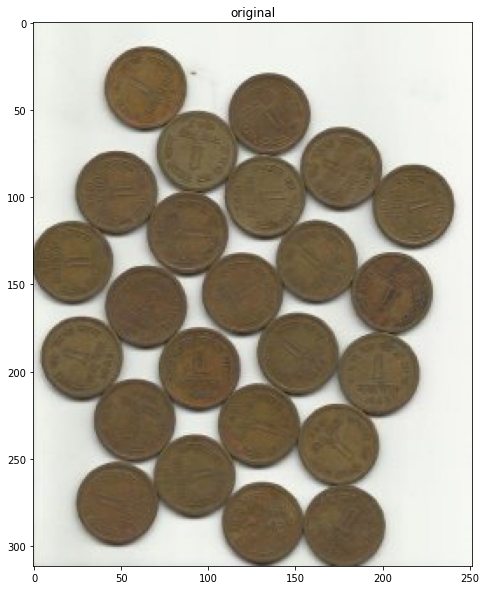

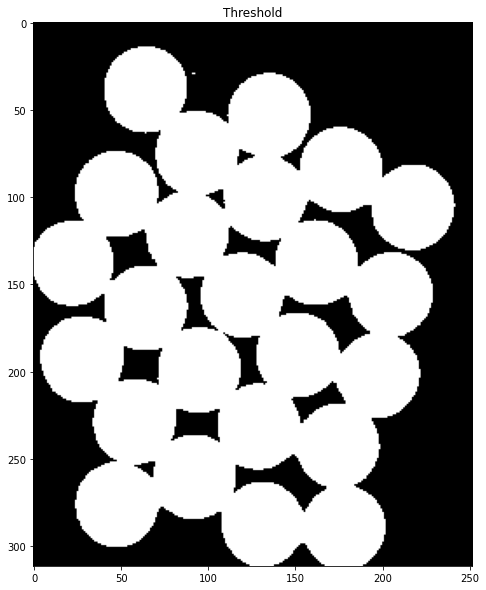

In [3]:
img = cv2.imread('/content/water_coins.jpg')
imshow('original', img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Threshold using OTSU
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

imshow('Threshold', thresh)


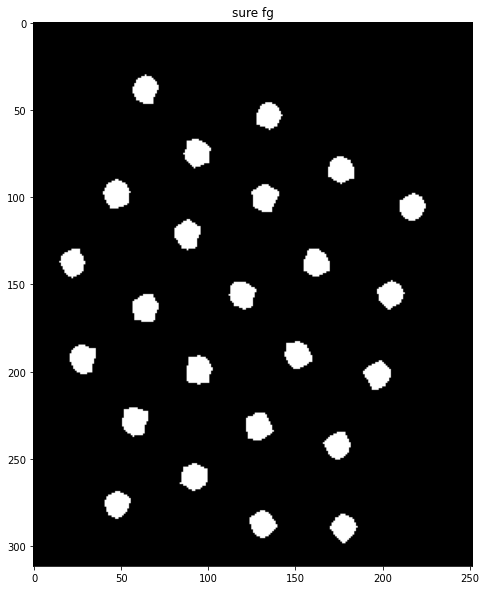

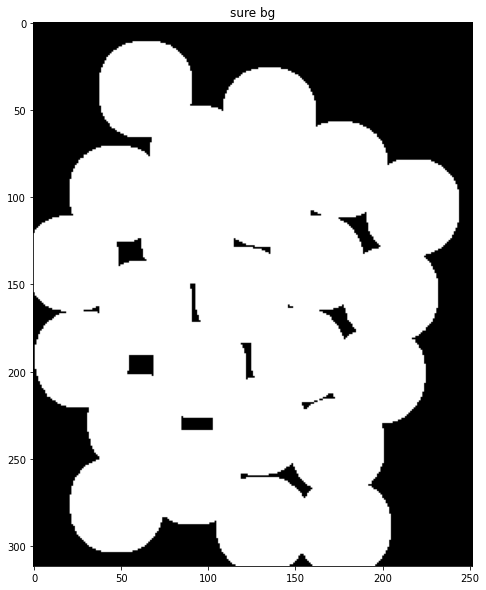

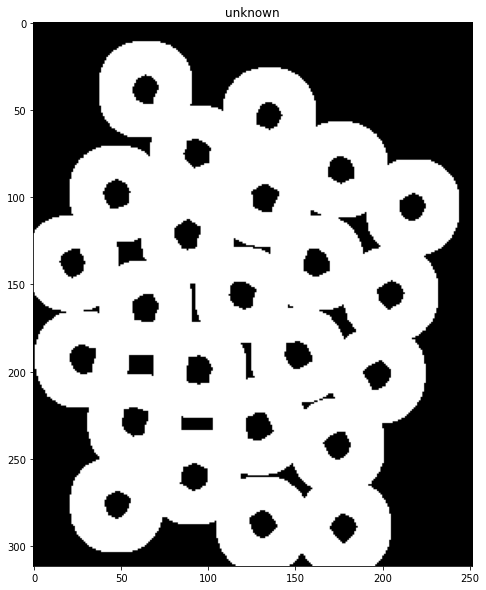

In [16]:
# noise removal
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

#sure backgraound area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

#finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

imshow('sure fg', sure_fg)
imshow('sure bg', sure_bg)
imshow('unknown', unknown)

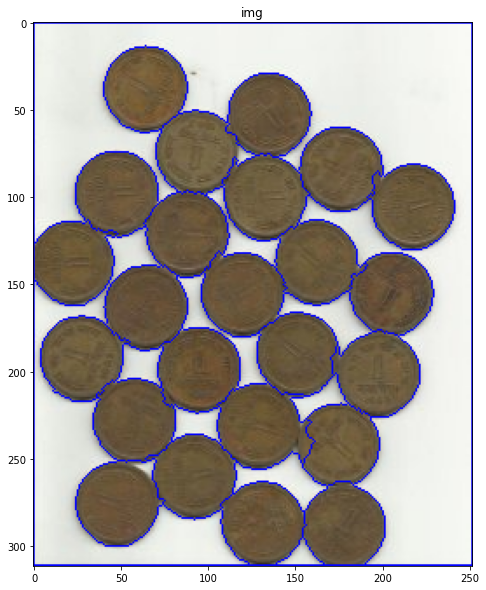

In [19]:
#marker labelling
#connected components determines the connectivity 
ret, markers = cv2.connectedComponents(sure_fg)

#add one to all labels so that sure background is not 0, but 1
markers = markers+1

#mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] =[255,0,0]

imshow('img', img)